In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('placement.csv')

In [3]:
print(df.shape)
df.head()

(100, 3)


,cgpa,resume_score,placed
0,8.14,6.52,1
1,6.17,5.17,0
2,8.27,8.86,1
3,6.88,7.27,1
4,7.52,7.30,1


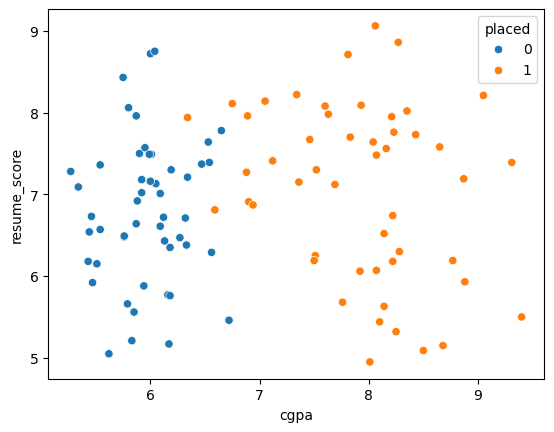

In [7]:
sns.scatterplot(data=df,x = 'cgpa',y = 'resume_score',hue=df['placed'])
plt.show()

In [8]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [9]:
from sklearn.linear_model import Perceptron
p = Perceptron()

In [10]:
p.fit(X,y)

Perceptron()

In [11]:
p.coef_

array([[ 40.26, -36.  ]])

In [12]:
p.intercept_

array([-25.])

In [15]:
from mlxtend.plotting import plot_decision_regions

c:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


<Axes: >

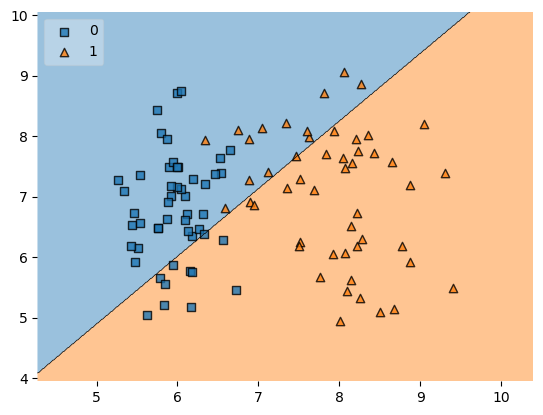

In [17]:
plot_decision_regions(X.values,y.values,clf=p,legend=2)

In [18]:
df = pd.read_csv('abalone.csv')
df.head()

,Type,LongestShell,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


- we are just practicing so lets take only two class and we will also use PCA pt take onlt two most important featueres

In [20]:
df['Type'].value_counts()

Type
M    1528
I    1342
F    1307
Name: count, dtype: int64

- lets take I, F  (balanced data)

In [21]:
df.columns = df.columns.str.lower()
df.head()

,type,longestshell,diameter,height,wholeweight,shuckedweight,visceraweight,shellweight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [24]:
df = df[(df['type'] == 'I' ) | (df['type'] == 'F')]

In [26]:
df.reset_index(drop=True)

,type,longestshell,diameter,height,wholeweight,shuckedweight,visceraweight,shellweight,rings
0,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
1,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
2,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
3,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.3300,20
4,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.2600,16
...,...,...,...,...,...,...,...,...,...
2644,I,0.405,0.300,0.085,0.3035,0.1500,0.0505,0.0880,7
2645,I,0.475,0.365,0.115,0.4990,0.2320,0.0885,0.1560,10
2646,F,0.515,0.400,0.125,0.6150,0.2865,0.1230,0.1765,8
2647,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11


In [27]:
df.isna().sum()

type             0
longestshell     0
diameter         0
height           0
wholeweight      0
shuckedweight    0
visceraweight    0
shellweight      0
rings            0
dtype: int64

In [28]:
df.duplicated().sum()

0

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2649 entries, 2 to 4175
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   type           2649 non-null   object 
 1   longestshell   2649 non-null   float64
 2   diameter       2649 non-null   float64
 3   height         2649 non-null   float64
 4   wholeweight    2649 non-null   float64
 5   shuckedweight  2649 non-null   float64
 6   visceraweight  2649 non-null   float64
 7   shellweight    2649 non-null   float64
 8   rings          2649 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 207.0+ KB


In [31]:
df.head()

,type,longestshell,diameter,height,wholeweight,shuckedweight,visceraweight,shellweight,rings
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16


In [32]:
df.describe()

,longestshell,diameter,height,wholeweight,shuckedweight,visceraweight,shellweight,rings
count,2649.000000,2649.000000,2649.000000,2649.000000,2649.000000,2649.000000,2649.000000,2649.000000
mean,0.502420,0.389766,0.132673,0.734883,0.316926,0.160433,0.213948,9.488486
std,0.124057,0.102599,0.043959,0.476925,0.209986,0.107188,0.137821,3.251185
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.420000,0.325000,0.105000,0.353500,0.153500,0.073500,0.105000,7.000000
50%,0.515000,0.400000,0.135000,0.651500,0.281000,0.141500,0.194500,9.000000
75%,0.600000,0.470000,0.160000,1.064500,0.455000,0.230000,0.304500,11.000000
max,0.815000,0.650000,1.130000,2.657000,1.488000,0.590000,1.005000,29.000000


In [35]:
x = df.iloc[:,1:]
y = df.iloc[:,0]

In [37]:
x.sample()

,longestshell,diameter,height,wholeweight,shuckedweight,visceraweight,shellweight,rings
1659,0.6,0.48,0.18,1.0645,0.4495,0.2455,0.325,10


In [38]:
y.sample()

184    F
Name: type, dtype: object

In [57]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [59]:
from sklearn.decomposition import PCA
pca = PCA(n_components=None)

In [60]:
x_trf = pca.fit_transform(x)

In [61]:
pca.explained_variance_

array([1.06872978e+01, 2.05484435e-01, 3.09006021e-03, 2.23915260e-03,
       8.64761106e-04, 5.83652975e-04, 3.80168099e-04, 1.48062141e-04])

In [62]:
pca = PCA(n_components=2)
x_trf = pca.fit_transform(x)

In [63]:
from sklearn.linear_model import Perceptron
p = Perceptron()

In [64]:
p.fit(x_trf,y)

Perceptron()

In [65]:
print("coefficient -->",p.coef_)
print("Intercept-->",p.intercept_)

coefficient --> [[ 1.0251685  -7.62061992]]
Intercept--> [2.]


<Axes: >

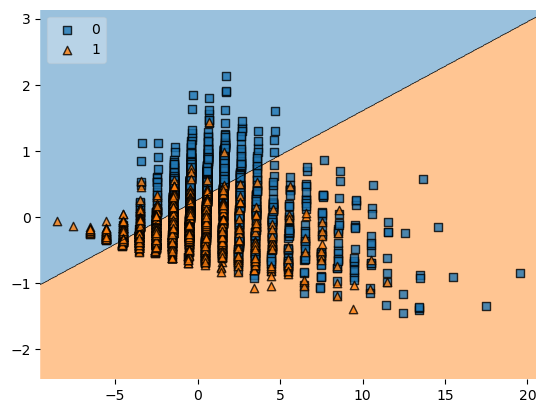

In [67]:
plot_decision_regions(x_trf,y,clf=p,legend=2)